In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [38]:
X, y = fetch_openml('mnist_784', return_X_y=True,)
print(X.shape, y.shape)

(70000, 784) (70000,)


In [39]:
y = y.astype(int)

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Model Training:

In [40]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel="linear", random_state=42, max_iter=600),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(
        eval_metric="mlogloss",
        tree_method="hist",
        use_label_encoder=False,
        random_state=42
    )
}

In [41]:
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model

Training Logistic Regression...
Training SVM...


c:\Python313\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=600).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Decision Tree...
Training Random Forest...
Training XGBoost...


c:\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:06:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Model Evaluation:

In [42]:
results = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print("\nModel Accuracy Comparison:\n", results_df)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1381
           1       0.95      0.97      0.96      1575
           2       0.93      0.90      0.91      1398
           3       0.90      0.89      0.89      1428
           4       0.93      0.92      0.93      1365
           5       0.88      0.87      0.88      1263
           6       0.94      0.96      0.95      1375
           7       0.93      0.94      0.94      1459
           8       0.89      0.88      0.89      1365
           9       0.90      0.89      0.90      1391

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1381
           1       0.87      0.98      0.92      1575
      

## Error Analysis:

In [43]:
def plot_misclassified(model, X_test, y_test, model_name, n=10):

    y_pred = model.predict(X_test)

    y_true = y_test.to_numpy() if hasattr(y_test, "to_numpy") else y_test
    mis_idx = np.where(y_pred != y_true)[0]
    n = min(n, len(mis_idx))

    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(mis_idx[:n]):
        img = X_test.iloc[idx].to_numpy().reshape(28, 28)
        plt.subplot(2, (n + 1) // 2, i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(f"True: {y_true[idx]} | Pred: {y_pred[idx]}")
        plt.axis("off")
    plt.suptitle(f"Misclassified Examples: {model_name}", fontsize=14)
    plt.tight_layout()
    plt.show()


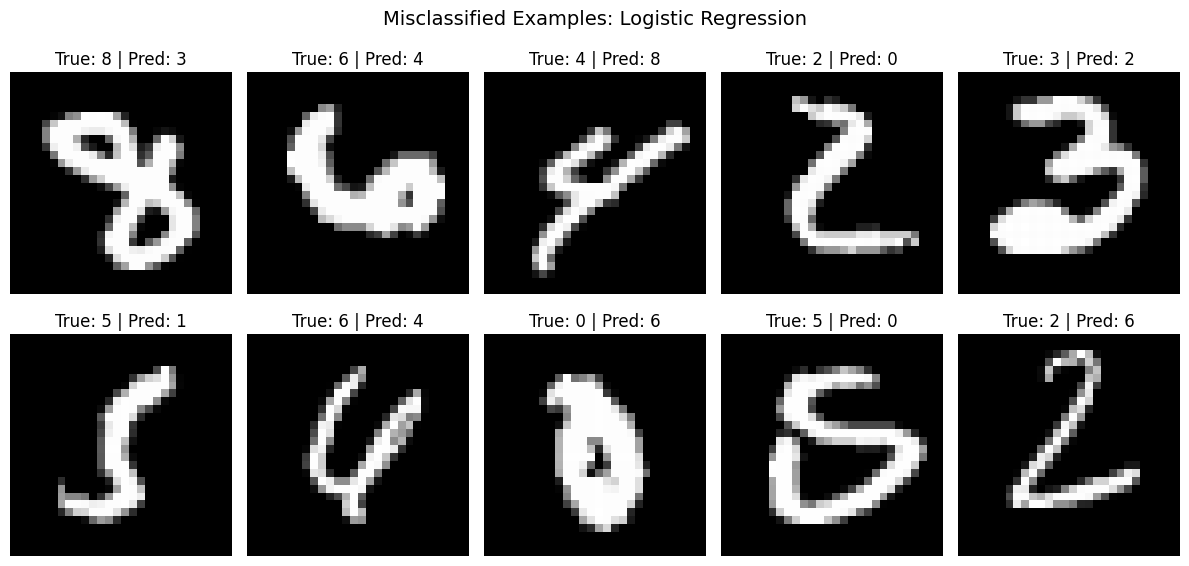

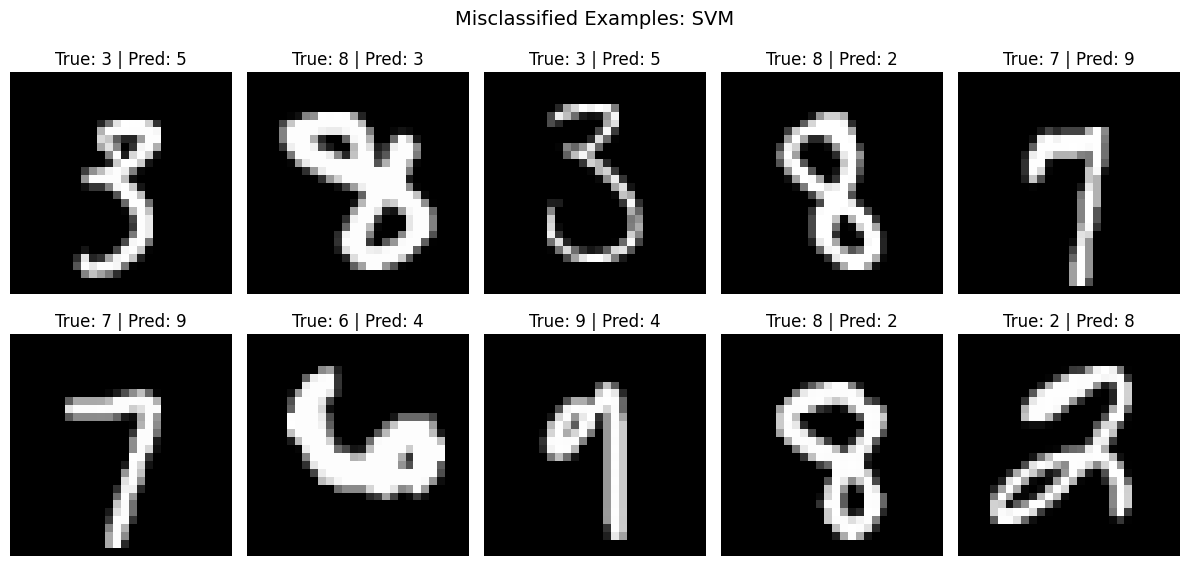

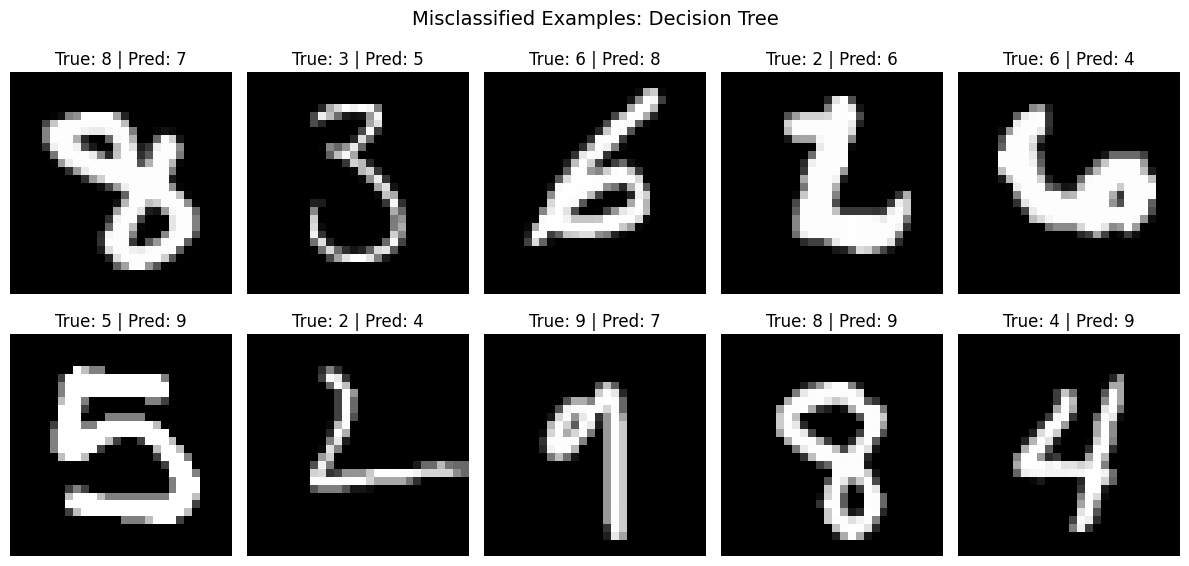

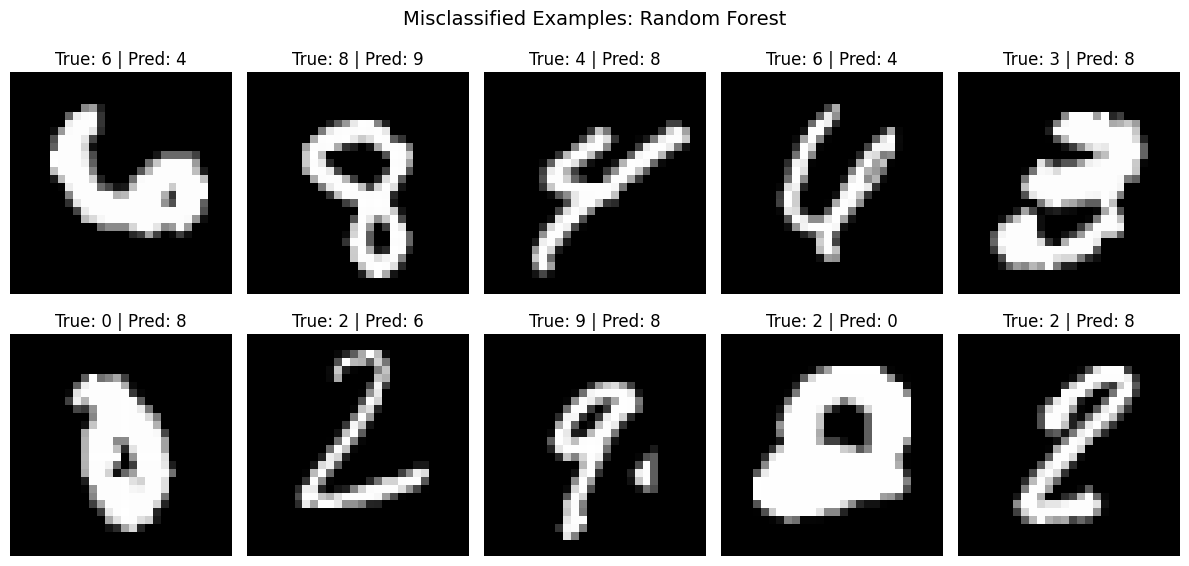

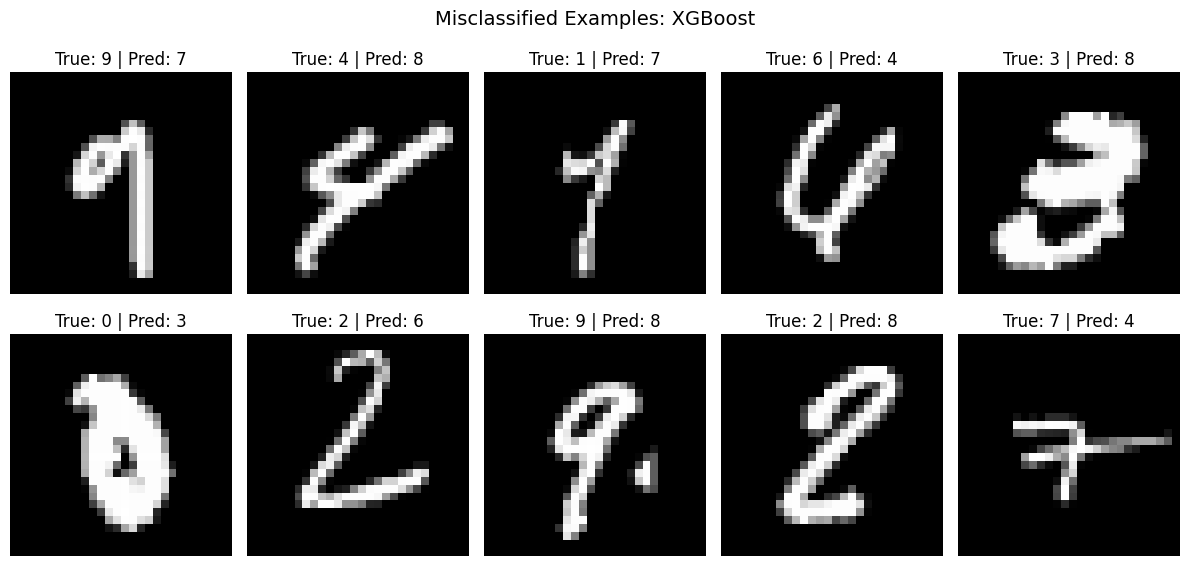

In [44]:
for name, model in trained_models.items():
    plot_misclassified(model, X_test, y_test, name, n=10)

## Output & Visualization:

Create a summary comparison of all models (e.g., table or bar chart of accuracy):

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21824\1790853366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


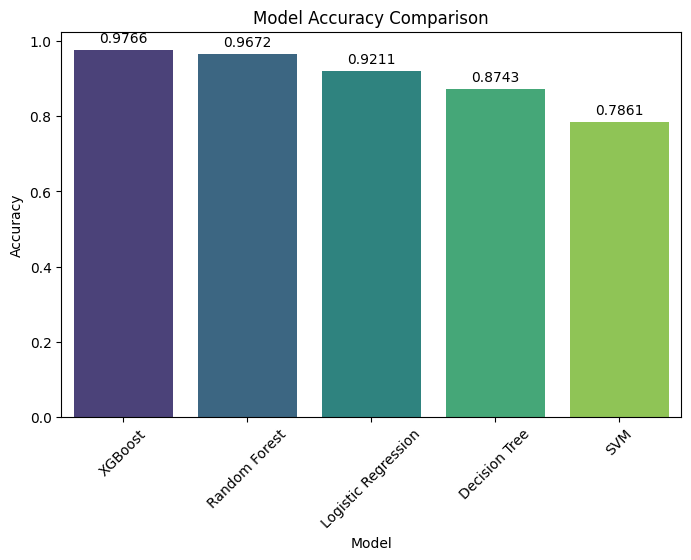

In [45]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.show()


Plot confusion matrices for each model:

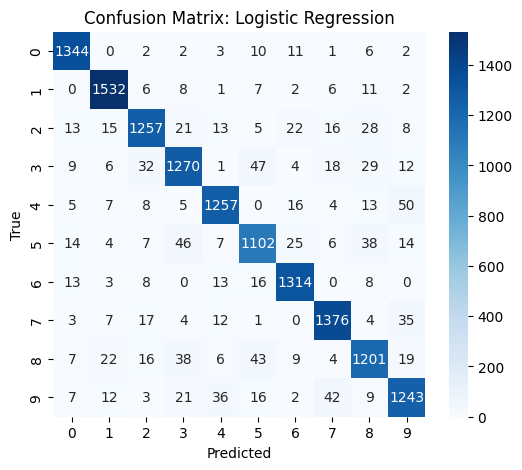

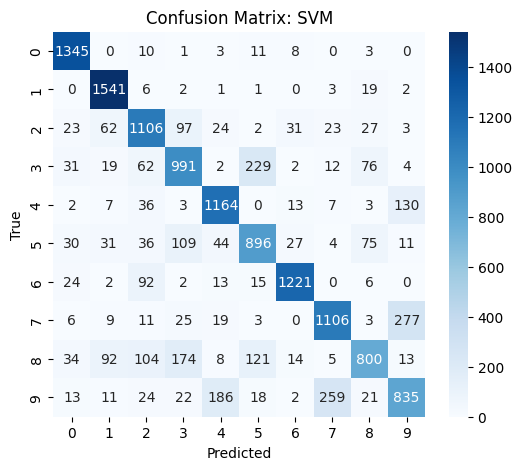

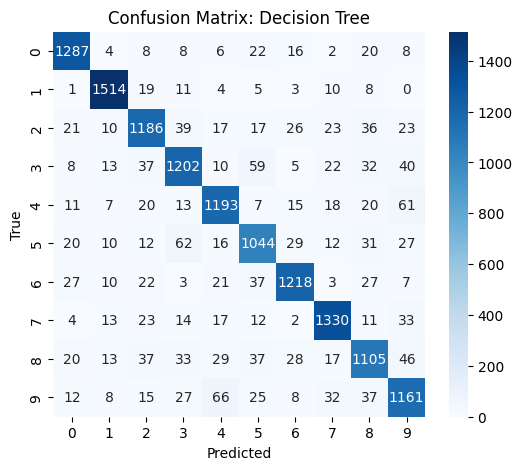

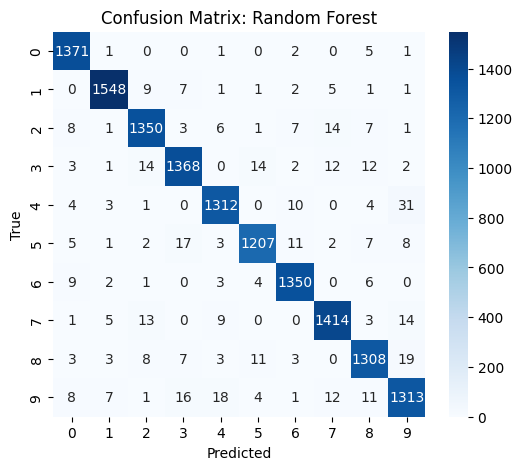

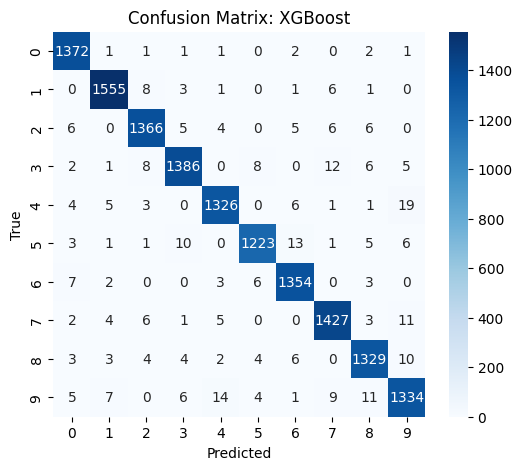

In [46]:
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()